In [1]:
from mastml.models import SklearnModel
from mastml.datasets import LocalDatasets
from mastml.feature_selectors import SklearnFeatureSelector
from mastml.feature_selectors import ShapFeatureSelector
from mastml.mastml import Mastml

Figshare is an optional dependency. To import data from figshare, manually install figshare via git clone of git clone https://github.com/cognoma/figshare.git


In [2]:
import sys
sys.path.append('MAST-ML')

In [3]:
SAVEPATH = 'drive/MyDrive/MASTML_SHAP_FeatureSelector'

mastml = Mastml(savepath=SAVEPATH)
savepath = mastml.get_savepath

drive/MyDrive/MASTML_SHAP_FeatureSelector not empty. Renaming...


## Import Dataset 

In [4]:
target = 'E_regression'

extra_columns = ['Material compositions 1', 'Material compositions 2']

d = LocalDatasets(file_path='../mastml/data/figshare_7418492/All_Model_Data.xlsx', #'MAST-ML/mastml/data/figshare_7418492/All_Model_Data.xlsx'
                  target=target, 
                  extra_columns=extra_columns, 
                  group_column='Material compositions 1',
                  testdata_columns=None,
                  as_frame=True)

# Load the data with the load_data() method
data_dict = d.load_data()

# Let's assign each data object to its respective name
X = data_dict['X']
y = data_dict['y']

This will return an xlsx file of the 10 features selected. Since make_plot is True, it will also save the plot of SHAP value of the features when we call evaluate. The default number of features to display in the plot is 10, we can change it by giving a value to the max_display parameter. 

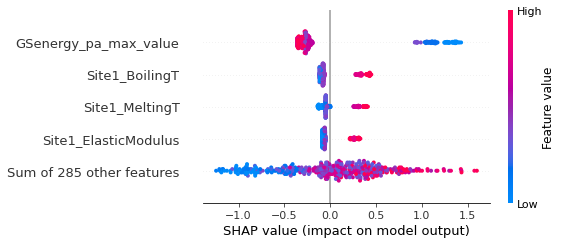

In [5]:
model = SklearnModel(model='RandomForestRegressor')
selector = ShapFeatureSelector(model=model, n_features_to_select= 10, make_plot = True, max_display= 5)
X = selector.evaluate(X=X, y=y, savepath=savepath, make_new_dir=True)